In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import GridSearchCV


In [4]:
train = pd.read_csv('our_train.csv')
test = pd.read_csv('our_validation.csv')

In [5]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (1183, 81)
Dimension of test data (277, 81)


In [6]:
print ("Basic statistical description:")
train.describe()

Basic statistical description:


/Users/aviv.r/workspace/algoR/Python/Taboola/products/DL/env/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1183.000000,1183.000000,974.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1175.000000,1183.000000,...,1183.000000,1183.000000,1183.00000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,725.790363,56.065089,70.408624,10547.555368,6.065934,5.551986,1970.818259,1984.360101,106.068936,445.354184,...,93.693998,46.469992,21.08115,3.816568,15.977177,2.424345,34.568047,6.323753,2007.792899,179689.221471
std,419.673538,41.907843,24.333824,10651.449432,1.380569,1.096276,30.204855,20.764708,181.645515,456.413001,...,124.630151,66.743408,58.69607,31.610082,56.466021,37.669560,305.952080,2.711292,1.321519,78563.159822
min,2.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,NaN,7582.500000,5.000000,5.000000,1953.000000,1966.000000,NaN,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,723.000000,50.000000,NaN,9453.000000,6.000000,5.000000,1972.000000,1993.000000,NaN,392.000000,...,0.000000,25.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,1084.500000,70.000000,NaN,11506.000000,7.000000,6.000000,2000.000000,2003.000000,NaN,712.500000,...,168.000000,66.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,386.00000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


# Comparison between test and train data

In [7]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1178,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1179,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1180,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1181,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1182,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
2,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
3,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
4,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300


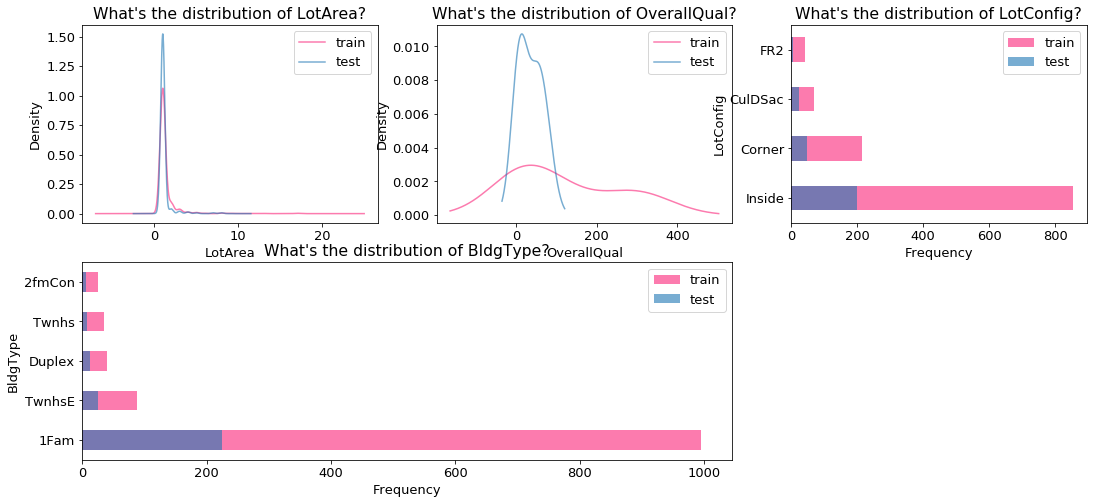

In [9]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.LotArea.value_counts().plot(kind='density', color='#FA2379', label='train', alpha=alpha)
test.LotArea.value_counts().plot(kind='density', label='test', alpha=alpha)
ax1.set_xlabel('LotArea')
ax1.set_title("What's the distribution of LotArea?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.OverallQual.value_counts().plot(kind='density', color='#FA2379', label='train', alpha=alpha)
test.OverallQual.value_counts().plot(kind='density', label='test', alpha=alpha)
ax2.set_xlabel('OverallQual')
ax2.set_title("What's the distribution of OverallQual?" )
plt.legend(loc='best')


ax3 = plt.subplot2grid((2,3), (0,2))
train.LotConfig.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.LotConfig.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('LotConfig')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of LotConfig?" )
plt.legend(loc='best')


ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.BldgType.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.BldgType.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax4.set_ylabel('BldgType')
ax4.set_xlabel('Frequency')
ax4.set_title("What's the distribution of BldgType?" )
plt.legend(loc='best')

In [11]:
train.isnull().sum()[train.isnull().sum() > 0] 

LotFrontage      209
Alley           1110
MasVnrType         8
MasVnrArea         8
BsmtQual          24
BsmtCond          24
BsmtExposure      25
BsmtFinType1      24
BsmtFinType2      25
Electrical         1
FireplaceQu      564
GarageType        61
GarageYrBlt       61
GarageFinish      61
GarageQual        61
GarageCond        61
PoolQC          1178
Fence            952
MiscFeature     1140
dtype: int64

In [12]:
test.isnull().sum()[test.isnull().sum() > 0]

LotFrontage      50
Alley           259
BsmtQual         13
BsmtCond         13
BsmtExposure     13
BsmtFinType1     13
BsmtFinType2     13
FireplaceQu     126
GarageType       20
GarageYrBlt      20
GarageFinish     20
GarageQual       20
GarageCond       20
PoolQC          275
Fence           227
MiscFeature     266
dtype: int64

In [64]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [57]:
new_train = train[['LotArea','OverallQual','LotConfig','BldgType','SalePrice']]
new_test = test[['LotArea','OverallQual','LotConfig','BldgType','SalePrice']]
new_train = pd.get_dummies(new_train, columns=['LotConfig', 'BldgType'])
new_test = pd.get_dummies(new_test, columns=['LotConfig', 'BldgType'])
new_test["LotConfig_FR3"] = 0

new_train.head(2)

,LotArea,OverallQual,SalePrice,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,9600,6,181500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11250,7,223500,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [58]:


X = new_train
y = new_train.SalePrice
X_train = new_train.drop(['SalePrice'], axis=1)
X_test = new_test.drop(['SalePrice'], axis=1)
y_train = new_train
y_test = new_test['SalePrice']

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [60]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

In [61]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
parameters = {}
clf_gnb = get_model(GNB, parameters, X_train, y_train, scoring)

In [62]:
for col in list(X_train):
    if col not in list(X_test):
        print col

0.0108303249097
GaussianNB(priors=None)


/Users/aviv.r/workspace/algoR/Python/Taboola/products/DL/env/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


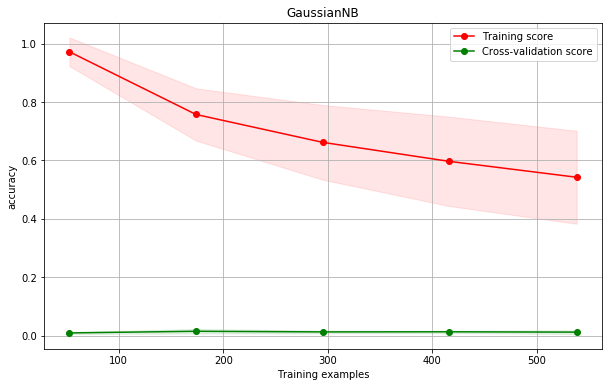

In [65]:
print (accuracy_score(y_test, clf_gnb.predict(X_test)))
print (clf_gnb)
plot_learning_curve(clf_gnb, 'GaussianNB', X, y, cv=4);

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12], 'n_jobs':[5]}
clf_rfc1 = get_model(rfc, parameters, X_train, y_train, scoring)

0.00361010830325
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=5, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


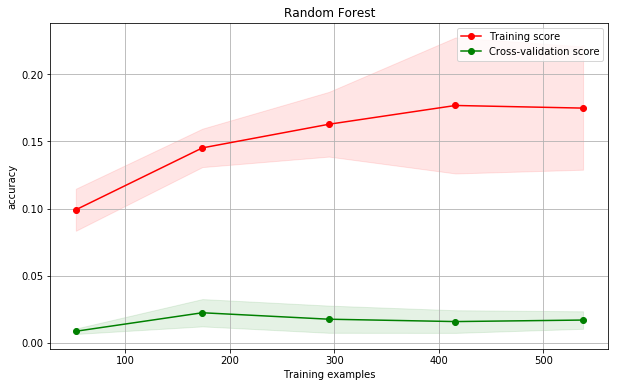

In [67]:
print (accuracy_score(y_test, clf_rfc1.predict(X_test)))
print (clf_rfc1)
plot_learning_curve(clf_rfc1, 'Random Forest', X, y, cv=4);

In [74]:
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1],
              'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

ImportError: No module named xgboost

In [ ]:
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)
plot_learning_curve(clf_xgb1, 'XGB', X, y, cv=4);